In [2]:
%cd /home/aditya/Documents/SOMBL/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import scripts.plot_utils as putils
import scripts.plot_densities as pdens
import scripts.calc_grgrstar_funcs  as grfuncs

sns.set()

/home/aditya/Documents/SOMBL


In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
length = 100
pattern = "altn_altupdown_updown"
# pattern = "alt_up_down"

In [5]:
colorbar_kwargs = {
    "location": "right",
    "fraction": 0.046,
    "pad": 0.04,
    "format": "%.2e"
}

In [6]:
def get_data(length, pattern):
    df = pd.read_csv(f"data/spin_imbalances_error_L{length}_{pattern}.dat")
    complex_types = {
        'spin_up_imb_S_plus': complex,
        'spin_up_imb_S_minus': complex,
        'spin_up_imb_S_x': complex,
        'spin_up_imb_S_y': complex,
        'spin_up_imb_S_z': complex,

        'spin_up_imb_S_plus_var': complex,
        'spin_up_imb_S_minus_var': complex,
        'spin_up_imb_S_x_var': complex,
        'spin_up_imb_S_y_var': complex,
        'spin_up_imb_S_z_var': complex
    }
    df = df.astype(complex_types)
    return df

In [7]:
df30 = get_data(30, pattern)
df60 = get_data(60, pattern)
df100 = get_data(100, pattern)

In [8]:
imbalances_real = ["spin_up_imb_n_up", "spin_up_imb_n_down",  "spin_up_imb_charge",
                   "spin_up_imb_S_x", "spin_up_imb_S_y", "spin_up_imb_S_z"]
imbalances_complex = ["spin_up_imb_S_plus",
            "spin_up_imb_S_minus", "spin_down_imb_S_plus", "spin_down_imb_S_minus",]
imbalances_considered = ["spin_up_imb_n_up"] #, "spin_down_imb_n_down"]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),)


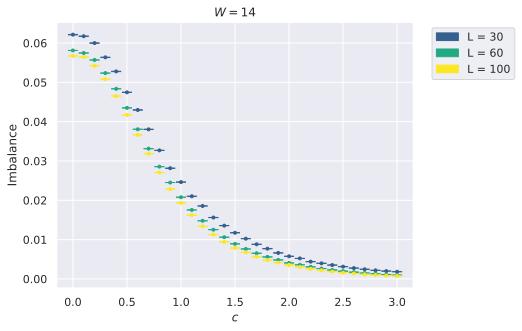

In [23]:
dfs = [df30, df60, df100]
lengths = [30, 60, 100]
cmap = plt.cm.viridis
colors = cmap([0.3, 0.6, 1])
disorder = 14
for i in range(3):
    df = dfs[i]
    length = lengths[i]
    data = df.loc[df["disorder"] == disorder]
    x = np.array(data["coupling"])
    y = np.real(data["spin_up_imb_charge"])
    yerr = np.sqrt(np.real(-data["spin_up_imb_charge_var"]))
    print(np.where(data["spin_up_imb_charge_var"] < 0))
    labels = data["disorder"]
    cmap = plt.cm.viridis
    for j in range(len(x)):
        plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
                     color=colors[i], capsize=5, label=f"L = {length}")
plt.title(r"$W = $" + f"{disorder}")
# plt.yscale("log")
plt.ylabel("Imbalance")
plt.xlabel(r"$c$")

handles = []
for i in range(len(lengths)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"L = {lengths[i]}"))
plt.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")

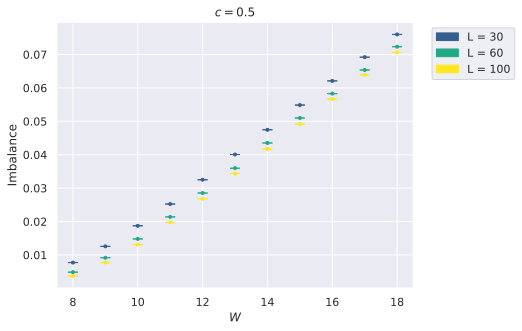

In [10]:
dfs = [df30, df60, df100]
lengths = [30, 60, 100]
cmap = plt.cm.viridis
colors = cmap([0.3, 0.6, 1])
coupling = 0.5
data30 = dfs[0].loc[np.isclose(dfs[0]["coupling"],coupling)]

for i in range(3):
    df = dfs[i]
    length = lengths[i]
    data = df.loc[np.isclose(df["coupling"],coupling)]
    x = np.array(data["disorder"])
    # y = (np.real(data["spin_up_imb_S_z"]) - np.real(data30["spin_up_imb_S_z"])) / np.real(data30["spin_up_imb_S_z"])
    y = np.real(data["spin_up_imb_charge"])
    yerr = np.real(data["spin_up_imb_charge_var"])
    labels = data["disorder"]
    cmap = plt.cm.viridis
    for j in range(len(x)):
        plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
                     color=colors[i], capsize=5, label=f"L = {length}")
        # plt.scatter(x[j], y[j], marker=".",
        #              color=colors[i], label=f"L = {length}")
plt.title(r"$c = $" + f"{coupling}")
# plt.yscale("log")
plt.ylabel("Imbalance")
plt.xlabel(r"$W$")

handles = []
for i in range(len(lengths)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"L = {lengths[i]}"))
plt.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")

In [11]:
dfs = [df30, df60, df100]
lengths = [30, 60, 100]
cmap = plt.cm.viridis
# couplings = [0, 0.5, 1, 1.5, 2, 2.5, 3.0]
disorders = [8, 10, 12, 14, 16, 18]
colors = cmap(np.linspace(0, 1, len(couplings)))
data30 = dfs[0].loc[np.isclose(dfs[0]["coupling"],coupling)]

# for i in range(3):
df = dfs[1]
length = lengths[1]

for i in range(len(disorders)):  
    # coupling = couplings[i]
    disorder = disorders[i]
    data = df.loc[np.isclose(df["disorder"],disorder)]
    x = np.array(data["coupling"])
    # y = (np.real(data["spin_up_imb_S_z"]) - np.real(data30["spin_up_imb_S_z"])) / np.real(data30["spin_up_imb_S_z"])
    y = np.real(data["spin_up_imb_charge"])
    yerr = np.real(data["spin_up_imb_charge_var"])
    labels = data["disorder"]
    cmap = plt.cm.viridis
    for j in range(len(x)):
        plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
                     color=colors[i], capsize=5, label=f"L = {length}")

# plt.yscale()
plt.title(r"$W = $" + f"{disorder}")
# plt.yscale("log")
plt.ylabel("Imbalance")
plt.xlabel(r"$c$")

handles = []
for i in range(len(disorders)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"W = {disorders[i]}"))
plt.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")

NameError: name 'couplings' is not defined

In [ ]:
dfs = [df30, df60, df100]
lengths = [30, 60, 100]
cmap = plt.cm.viridis
# couplings = [0, 0.5, 1, 1.5, 2, 2.5, 3.0]
disorders = [8, 10, 12, 14, 16, 18]
colors = cmap(np.linspace(0, 1, len(couplings)))
data30 = dfs[0].loc[np.isclose(dfs[0]["coupling"],coupling)]

# for i in range(3):
df = dfs[1]
length = lengths[1]

for i in range(len(disorders)):  
    # coupling = couplings[i]
    disorder = disorders[i]
    data = df.loc[np.isclose(df["disorder"],disorder)]
    x = np.array(data["coupling"])
    # y = (np.real(data["spin_up_imb_S_z"]) - np.real(data30["spin_up_imb_S_z"])) / np.real(data30["spin_up_imb_S_z"])
    y = np.real(data["spin_up_imb_charge"])
    yerr = np.real(data["spin_up_imb_charge_var"])
    labels = data["disorder"]
    cmap = plt.cm.viridis
    for j in range(len(x)):
        plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
                     color=colors[i], capsize=5, label=f"L = {length}")

# plt.yscale()
plt.title(r"$W = $" + f"{disorder}")
# plt.yscale("log")
plt.ylabel("Imbalance")
plt.xlabel(r"$c$")

handles = []
for i in range(len(disorders)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"W = {disorders[i]}"))
plt.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=3, sharex=True, sharey=True, figsize=(8, 12))
for index in range(6):
    disorder = 8 + index
    ax = axes.flatten()[index]
    dfs = [df30, df60, df100]
    lengths = [30, 60, 100]
    cmap = plt.cm.viridis
    colors = cmap([0.3, 0.6, 1])

    for i in range(3):
        df = dfs[i]
        length = lengths[i]
        data = df.loc[df["disorder"] == disorder]
        x = np.array(data["coupling"])
        y = np.real(data["spin_up_imb_S_z"])
        yerr = np.real(data["spin_up_imb_S_z_var"])
        labels = data["disorder"]
        cmap = plt.cm.viridis
        for j in range(len(x)):
            ax.scatter(x[j], y[j], marker=".",
                         color=colors[i], label=f"L = {length}")
    ax.set_title(r"$W = $" + f"{disorder}")
    # ax.set_yscale("log")
    # ax.set_ylabel("Imbalance")
    # ax.set_xlabel(r"$c$")

handles = []
for i in range(len(lengths)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"L = {lengths[i]}"))
axes[0, 1].legend(handles=handles, bbox_to_anchor=(1.55,1.0), loc="upper right")

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=3, sharex=True, sharey=True, figsize=(8, 12))
for index in range(6):
    disorder = 8 + index
    ax = axes.flatten()[index]
    dfs = [df30, df60, df100]
    lengths = [30, 60, 100]
    cmap = plt.cm.viridis
    colors = cmap([0.3, 0.6, 1])

    for i in range(3):
        df = dfs[i]
        length = lengths[i]
        data = df.loc[df["disorder"] == disorder]
        x = np.array(data["coupling"])
        y = np.real(data["spin_up_imb_S_z"])
        yerr = np.real(data["spin_up_imb_S_z_var"])
        labels = data["disorder"]
        cmap = plt.cm.viridis
        for j in range(len(x)):
            ax.scatter(x[j], y[j], marker=".",
                         color=colors[i], label=f"L = {length}")
    ax.set_title(r"$W = $" + f"{disorder}")
    # ax.set_yscale("log")
    # ax.set_ylabel("Imbalance")
    # ax.set_xlabel(r"$c$")

handles = []
for i in range(len(lengths)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"L = {lengths[i]}"))
axes[0, 1].legend(handles=handles, bbox_to_anchor=(1.55,1.0), loc="upper right")

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=3, sharex=True, sharey=True, figsize=(8, 12))
for index in range(6):
    disorder = 8 + index
    ax = axes.flatten()[index]
    dfs = [df30, df60, df100]
    lengths = [30, 60, 100]
    cmap = plt.cm.viridis
    colors = cmap([0.3, 0.6, 1])

    for i in range(3):
        df = dfs[i]
        length = lengths[i]
        data = df.loc[df["disorder"] == disorder]
        x = np.array(data["coupling"])
        y = np.real(data["spin_up_imb_S_z"])
        yerr = np.real(data["spin_up_imb_S_z_var"])
        labels = data["disorder"]
        cmap = plt.cm.viridis
        for j in range(len(x)):
            ax.scatter(x[j], y[j], marker=".",
                         color=colors[i], label=f"L = {length}")
    ax.set_title(r"$W = $" + f"{disorder}")
    # ax.set_yscale("log")
    # ax.set_ylabel("Imbalance")
    # ax.set_xlabel(r"$c$")

handles = []
for i in range(len(lengths)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"L = {lengths[i]}"))
axes[0, 1].legend(handles=handles, bbox_to_anchor=(1.55,1.0), loc="upper right")

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 11))
for i, imb in enumerate(imbalances_real):
    ax = axes.flatten()[i]
    # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
    # sns.scatterplot(data=df, x="coupling", y=np.real(df[imb]), hue="disorder", ax=ax, palette="deep")
    x = df["coupling"]
    y = np.real(df[imb])
    yerr = np.sqrt(np.real(df[imb+"_var"]))
    labels = df["disorder"]
    ax.errorbar(x, y, yerr=yerr, label=labels, linestyle="", marker=".", capsize=5)
    # ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
    # ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title(imb)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
# print(df["spin_up_imb_S_x"])

data = df

# mask = df["disorder"].isin([12, 13, 14])
# mask = df.isin({"coupling": [0.5, 1.5], "disorder": [15, 18]})
# data = df[mask]
# print(mask)


# sns.scatterplot(data=data, x="coupling", y=, hue="disorder", ax=ax)
x = np.array(data["coupling"])
y = np.real(data["spin_up_imb_S_y"])
yerr = np.real(data["spin_up_imb_S_y_var"])
labels = data["disorder"]
cmap = plt.cm.viridis
colors = cmap(labels / labels.max())
uniqlabels = np.unique(labels)
labelcolors = cmap(uniqlabels / labels.max())
for i in range(len(x)):
    ax.errorbar(x[i], y[i], yerr=yerr[i], color=colors[i], linestyle="", marker=".", capsize=5)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_yscale("log")
handles = []
for i in range(len(uniqlabels)):
    handles.append(mpl.patches.Patch(color=labelcolors[i], label=f"W = {uniqlabels[i]}"))
ax.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")